In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [30]:
#1
df = pd.read_csv("euro2024_players.csv")
df.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


Ülkelere Ait Toplam Futbolcu Sayısı

In [32]:
df["Country"].value_counts()

Country
Poland            27
Serbia            26
Portugal          26
Georgia           26
Turkiye           26
Ukraine           26
Romania           26
Slovakia          26
Austria           26
Netherlands       26
Scotland          26
Germany           26
Denmark           26
England           26
Slovenia          26
Italy             26
Albania           26
Croatia           26
Spain             26
Switzerland       26
Hungary           26
Czech Republic    26
France            25
Belgium           25
Name: count, dtype: int64

Kulüplere Ait Futbolcu Sayıları

In [33]:
df["Club"].value_counts()

Club
Manchester City          13
Inter Milan              13
FC Barcelona             12
Real Madrid              12
Paris Saint-Germain      12
                         ..
FC Südtirol               1
NK Olimpija Ljubljana     1
Barnsley FC               1
NK Celje                  1
Twente Enschede FC        1
Name: count, Length: 219, dtype: int64

Hangi Pozisyonlar Var

In [34]:
df["Position"].unique()

array(['Goalkeeper', 'Centre-Back', 'Left-Back', 'Right-Back',
       'Defensive Midfield', 'Central Midfield', 'Attacking Midfield',
       'Left Winger', 'Right Winger', 'Second Striker', 'Centre-Forward',
       'Right Midfield', 'Left Midfield'], dtype=object)

C:\Users\Nesrin\AppData\Local\Temp\ipykernel_10012\2257222578.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(position_counts, palette="coolwarm")


Text(0.5, 1.0, 'Counts of Position')

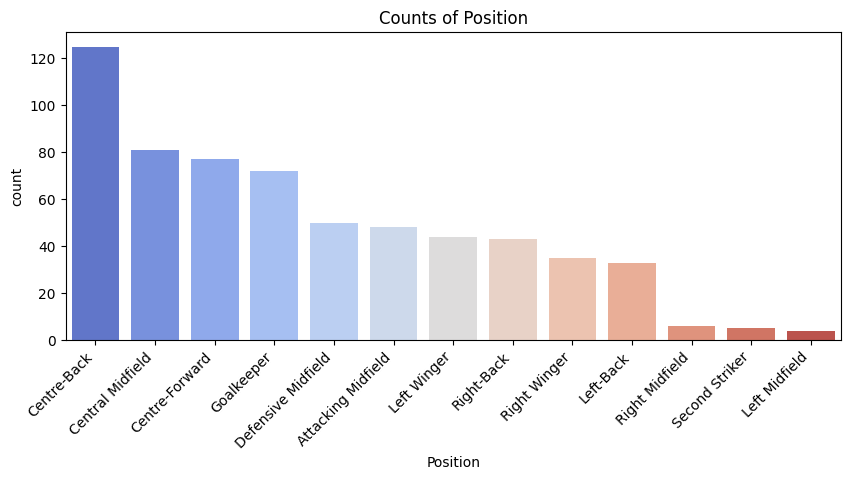

In [35]:
position_counts = df["Position"].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(position_counts, palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title("Counts of Position")

In [36]:
age_mean = df["Age"].mean()
print("Futbolcuların Yaş Ortalaması:",age_mean)

Futbolcuların Yaş Ortalaması: 27.040128410914928


En Genç Futbolcunun Bilgileri

In [37]:
enk = df[df["Age"]==df["Age"].min()]
enk

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
126,Lamine Yamal,Right Winger,16,FC Barcelona,178,left,6,2,90000000,Spain


En Yaşlı Futbolcunun Bilgileri

In [38]:
enb = df[df["Age"]==df["Age"].max()]
enb

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
577,Pepe,Centre-Back,41,FC Porto,187,right,136,8,500000,Portugal


Ülkelerin Futbolcularının Yaş Ortalaması

In [39]:
country_mean_age = df.groupby(["Country"])["Age"].mean()
country_mean_age

Country
Albania           27.307692
Austria           26.807692
Belgium           26.880000
Croatia           27.692308
Czech Republic    25.307692
Denmark           27.692308
England           26.076923
France            26.880000
Georgia           27.153846
Germany           28.115385
Hungary           27.423077
Italy             26.500000
Netherlands       26.538462
Poland            27.555556
Portugal          26.961538
Romania           27.000000
Scotland          28.230769
Serbia            27.384615
Slovakia          27.269231
Slovenia          27.346154
Spain             26.961538
Switzerland       27.692308
Turkiye           25.807692
Ukraine           26.346154
Name: Age, dtype: float64

In [40]:
print("{} İle En Yüksek Yaş Ortalamasına Sahip Ülke: {}" .format(round(country_mean_age.max(),2),country_mean_age.idxmax()))

28.23 İle En Yüksek Yaş Ortalamasına Sahip Ülke: Scotland


In [41]:
print("{} İle En Düşük Yaş Ortalamasına Sahip Ülke: {}" .format(round(country_mean_age.min(),2),country_mean_age.idxmin()))

25.31 İle En Düşük Yaş Ortalamasına Sahip Ülke: Czech Republic


C:\Users\Nesrin\AppData\Local\Temp\ipykernel_10012\1632886672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(country_mean_age,palette="coolwarm")


Text(0.5, 1.0, 'Ülkelere Göre Futbolcuların Yaş Ortalaması')

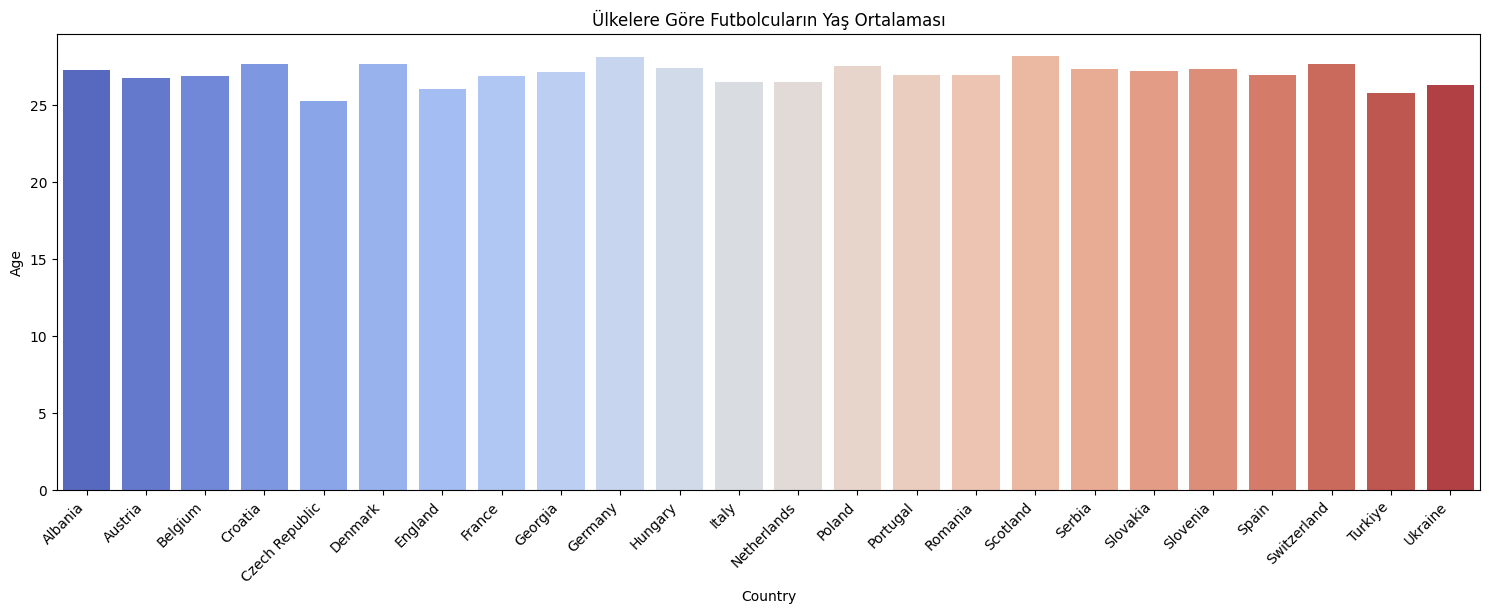

In [42]:
plt.figure(figsize=(15,6))
sns.barplot(country_mean_age,palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title("Ülkelere Göre Futbolcuların Yaş Ortalaması")

Sağ ve Sol ayaklı Futbolcuların Sayısı

In [43]:
df["Foot"].value_counts()

Foot
right    436
left     150
both      31
-          3
Name: count, dtype: int64

In [44]:
df.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [45]:
print("Futbolcu Market Değerlerinin Ortalaması")
df["MarketValue"].mean()

Futbolcu Market Değerlerinin Ortalaması


18409028.892455857

En Yüksek Değere Sahip Futbolcu Bilgileri

In [46]:
df[df["MarketValue"]==df["MarketValue"].max()]

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
250,Jude Bellingham,Attacking Midfield,20,Real Madrid,186,right,29,3,180000000,England
411,Kylian Mbappé,Centre-Forward,25,Paris Saint-Germain,178,right,78,47,180000000,France


En Çok Gol Atan Futbolcu Bilgileri

In [47]:
df[df["Goals"]==df["Goals"].max()]

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
596,Cristiano Ronaldo,Centre-Forward,39,Al-Nassr FC,188,right,206,128,15000000,Portugal


In [48]:
country_marketValue = df.groupby(["Country"])[["MarketValue"]].sum().reset_index()
country_marketValue

,Country,MarketValue
0,Albania,111600000
1,Austria,235500000
2,Belgium,584500000
3,Croatia,327700000
4,Czech Republic,193900000
5,Denmark,415500000
6,England,1515000000
7,France,1234000000
8,Georgia,160150000
9,Germany,851000000


Türk Futbolcu Olan Takımlar ve Sayıları

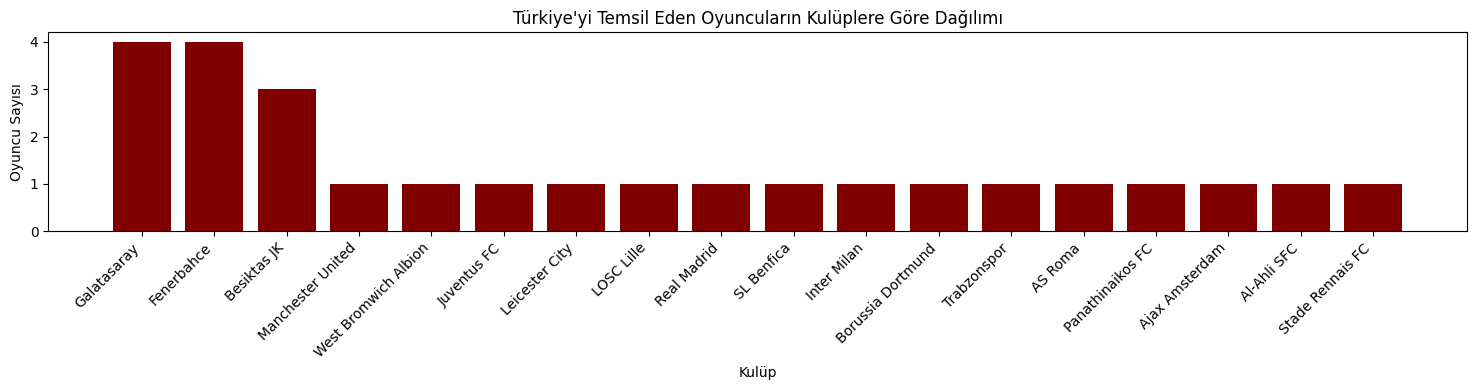

In [49]:
turkey_players=df[df["Country"]=="Turkiye"]
turkey_club_counts = turkey_players["Club"].value_counts()
clubs = turkey_club_counts.index
counts = turkey_club_counts.values

plt.figure(figsize=(15, 4))
plt.bar(clubs, counts, color='maroon')
plt.xlabel('Kulüp')
plt.ylabel('Oyuncu Sayısı')
plt.title('Türkiye\'yi Temsil Eden Oyuncuların Kulüplere Göre Dağılımı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


En Yüksek Market Değerine Sahip İlk 5 Ülke

In [50]:
top_country_values = country_marketValue.sort_values(by="MarketValue",ascending=False).head(5).reset_index()
top_country_values

,index,Country,MarketValue
0,6,England,1515000000
1,7,France,1234000000
2,14,Portugal,1054500000
3,20,Spain,965500000
4,9,Germany,851000000


C:\Users\Nesrin\AppData\Local\Temp\ipykernel_10012\2540956674.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Country", y="MarketValue", data=top_country_values, palette="viridis")


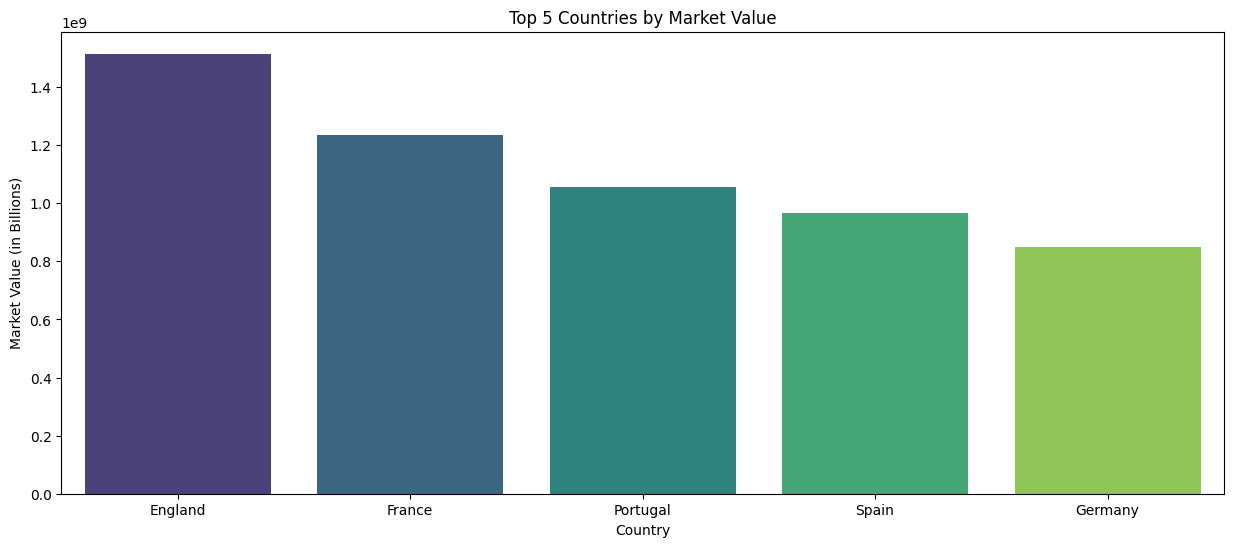

In [51]:
plt.figure(figsize=(15, 6))
sns.barplot(x="Country", y="MarketValue", data=top_country_values, palette="viridis")
plt.title("Top 5 Countries by Market Value")
plt.xlabel("Country")
plt.ylabel("Market Value (in Billions)")
plt.show()

Pozisyona Göre Gol Bilgileri

In [52]:
position_goals = df.groupby(["Position"])[["Goals"]].sum().reset_index()
position_goals

,Position,Goals
0,Attacking Midfield,262
1,Central Midfield,340
2,Centre-Back,181
3,Centre-Forward,1081
4,Defensive Midfield,119
5,Goalkeeper,0
6,Left Midfield,5
7,Left Winger,239
8,Left-Back,35
9,Right Midfield,11


C:\Users\Nesrin\AppData\Local\Temp\ipykernel_10012\3574772987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Position", y="Goals", data=position_goals, palette="viridis")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Attacking Midfield'),
  Text(1, 0, 'Central Midfield'),
  Text(2, 0, 'Centre-Back'),
  Text(3, 0, 'Centre-Forward'),
  Text(4, 0, 'Defensive Midfield'),
  Text(5, 0, 'Goalkeeper'),
  Text(6, 0, 'Left Midfield'),
  Text(7, 0, 'Left Winger'),
  Text(8, 0, 'Left-Back'),
  Text(9, 0, 'Right Midfield'),
  Text(10, 0, 'Right Winger'),
  Text(11, 0, 'Right-Back'),
  Text(12, 0, 'Second Striker')])

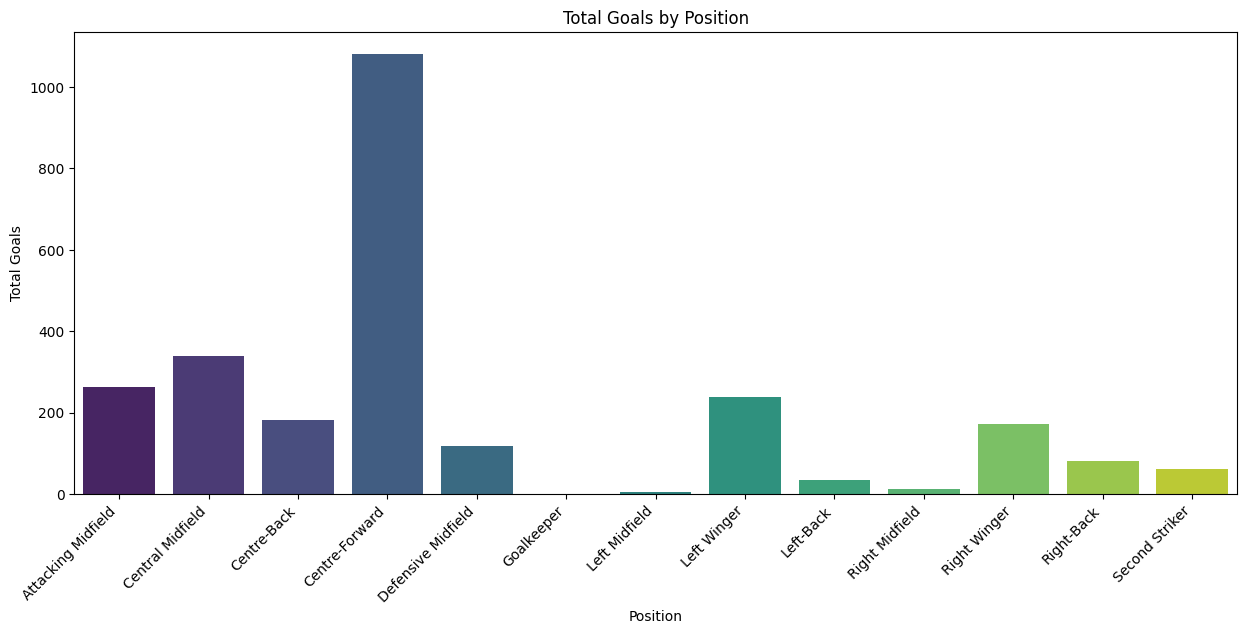

In [53]:
plt.figure(figsize=(15,6))
sns.barplot(x="Position", y="Goals", data=position_goals, palette="viridis")
plt.title("Total Goals by Position")
plt.xlabel("Position")
plt.ylabel("Total Goals")
plt.xticks(rotation=45, ha='right')
